In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Задание 1

In [3]:
df = pd.read_csv("../content/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1 Задание

In [5]:
price_describe = df['price'].describe()
print(f"""      Всего в датасете представлено {int(price_describe['count'])} цен(-ы) на недвижимость в диапазоне от {price_describe['min']:.2f} до {price_describe['max']:.2f}.
      Средняя цена составляет {price_describe['mean']:.2f}.
      1-ый, 2-ой и 3-ий квартили составляют {price_describe['25%']:.2f}, {price_describe['50%']:.2f} и {price_describe['75%']:.2f} соответственно.""")

      Всего в датасете представлено 21613 цен(-ы) на недвижимость в диапазоне от 75000.00 до 7700000.00.
      Средняя цена составляет 540088.14.
      1-ый, 2-ой и 3-ий квартили составляют 321950.00, 450000.00 и 645000.00 соответственно.


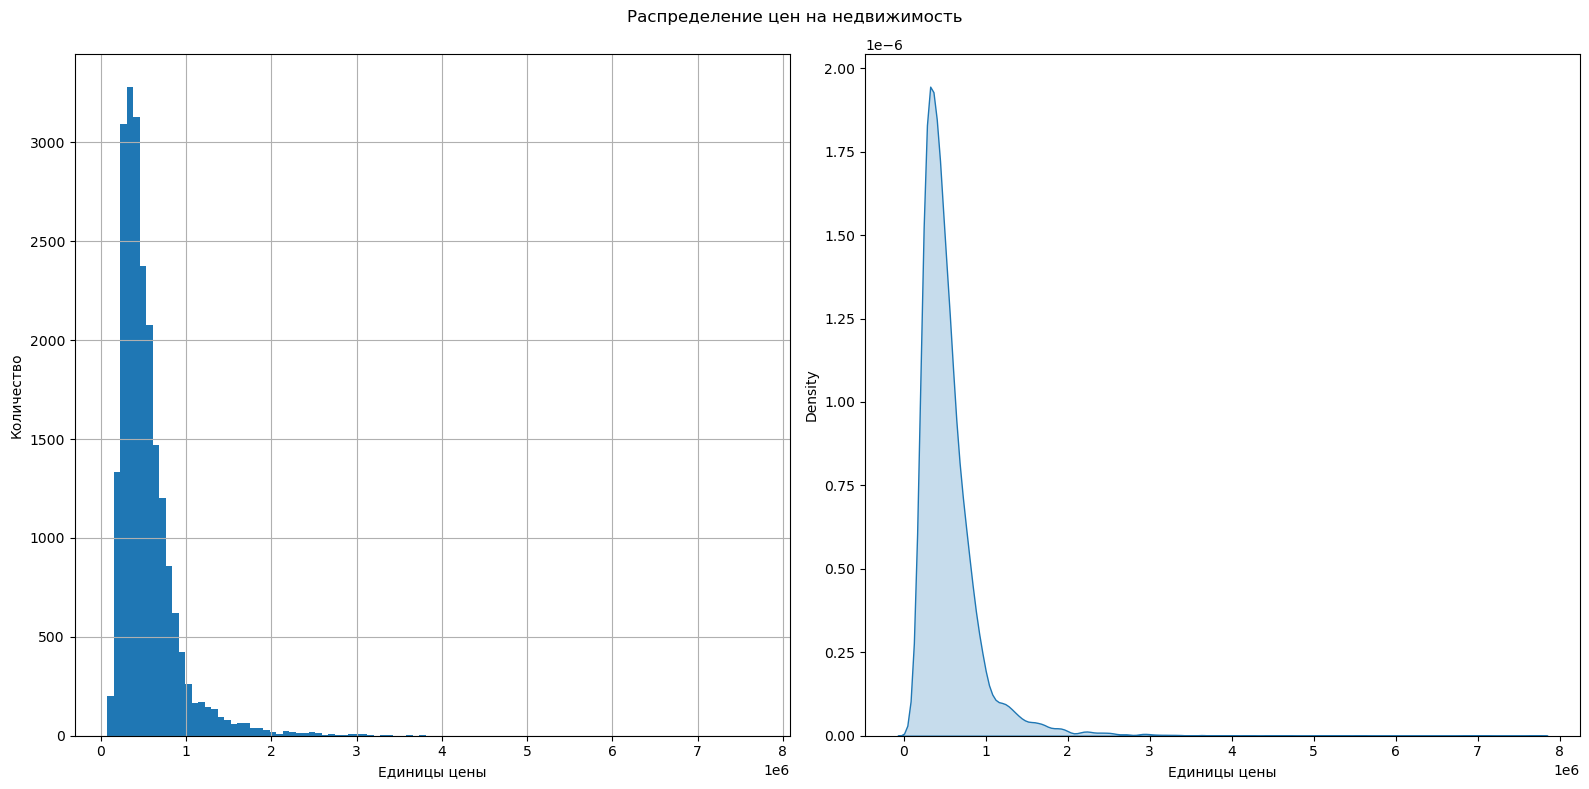

In [6]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
df['price'].hist(density=False, bins=100)
plt.xlabel('Единицы цены')
plt.ylabel('Количество')


plt.subplot(122)
sns.kdeplot(df['price'], legend=False, shade=True)
plt.xlabel('Единицы цены')

plt.suptitle('Распределение цен на недвижимость')
plt.tight_layout()
plt.show()

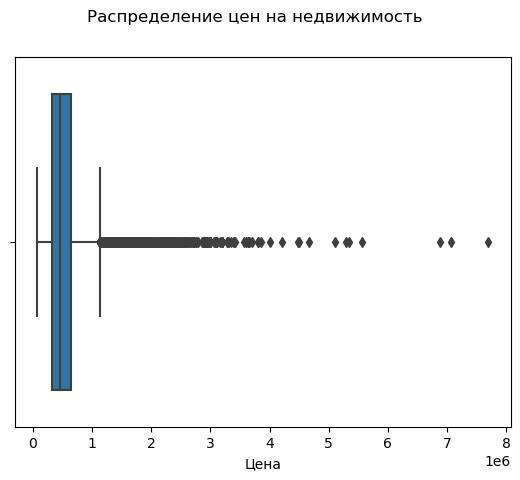

In [10]:
sns.boxplot(data=df, x='price', whis=1.5)
plt.suptitle('Распределение цен на недвижимость')
plt.xlabel('Цена');

Распределение цен на недвижимость имеет длинный хвост

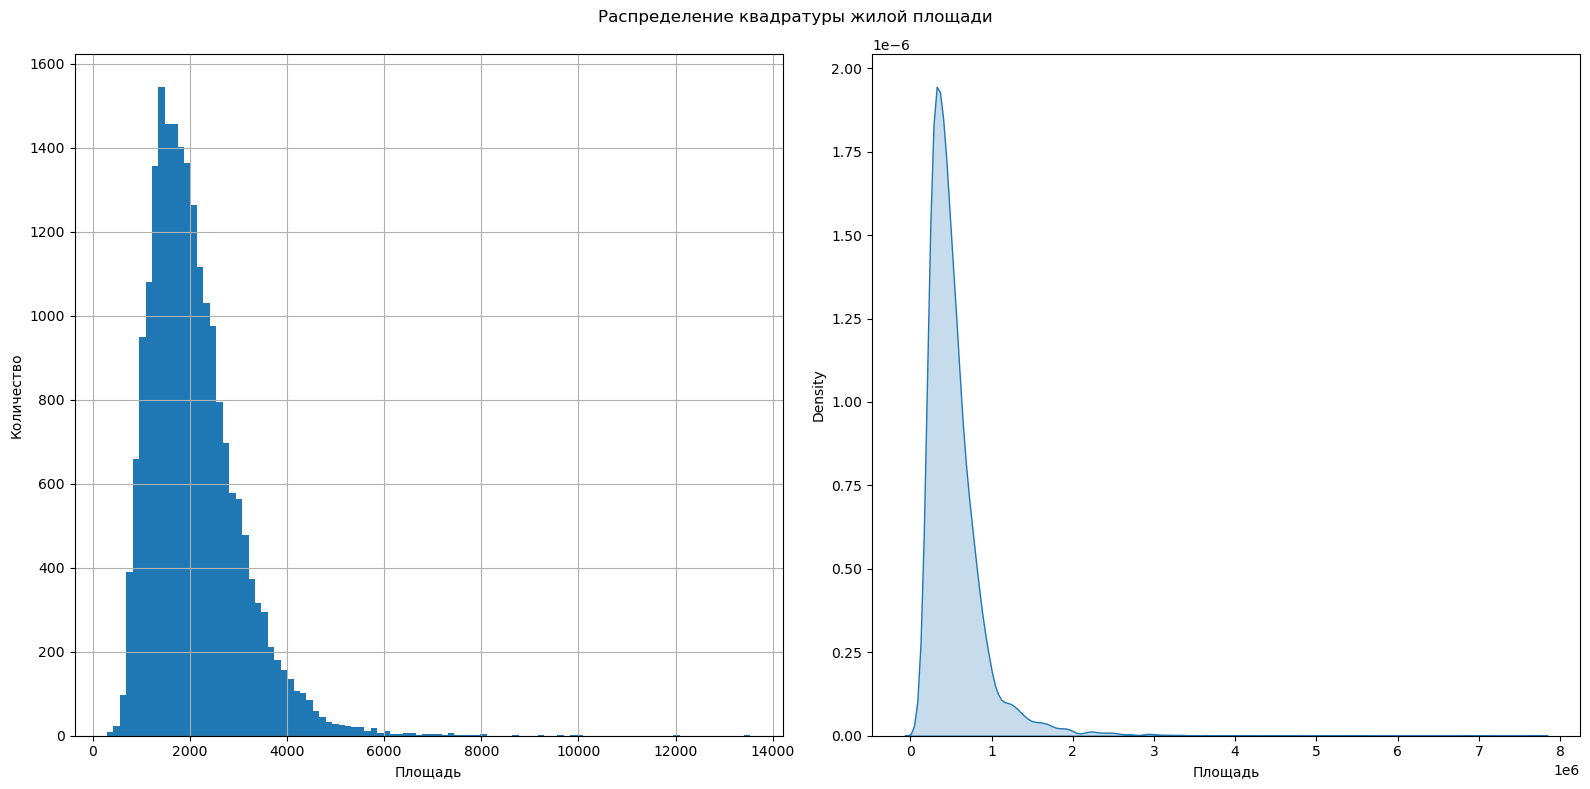

In [6]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
df['sqft_living'].hist(density=False, bins=100)
plt.xlabel('Площадь')
plt.ylabel('Количество')


plt.subplot(122)
sns.kdeplot(df['price'], legend=False, shade=True)
plt.xlabel('Площадь')

plt.suptitle('Распределение квадратуры жилой площади')
plt.tight_layout()
plt.show()

Распределение квадратуры жилой площади также имеет длинный хвост

In [7]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

116 уникальных значений года - это много для `barplot`'a. Разобьем на 10 интервалов:

In [8]:
df['yr_built_group'] = pd.qcut(df['yr_built'], 10)

In [9]:
yr_built_counts_df = df['yr_built_group'].value_counts().reset_index()
yr_built_counts_df.columns = ['year_period', 'counts']

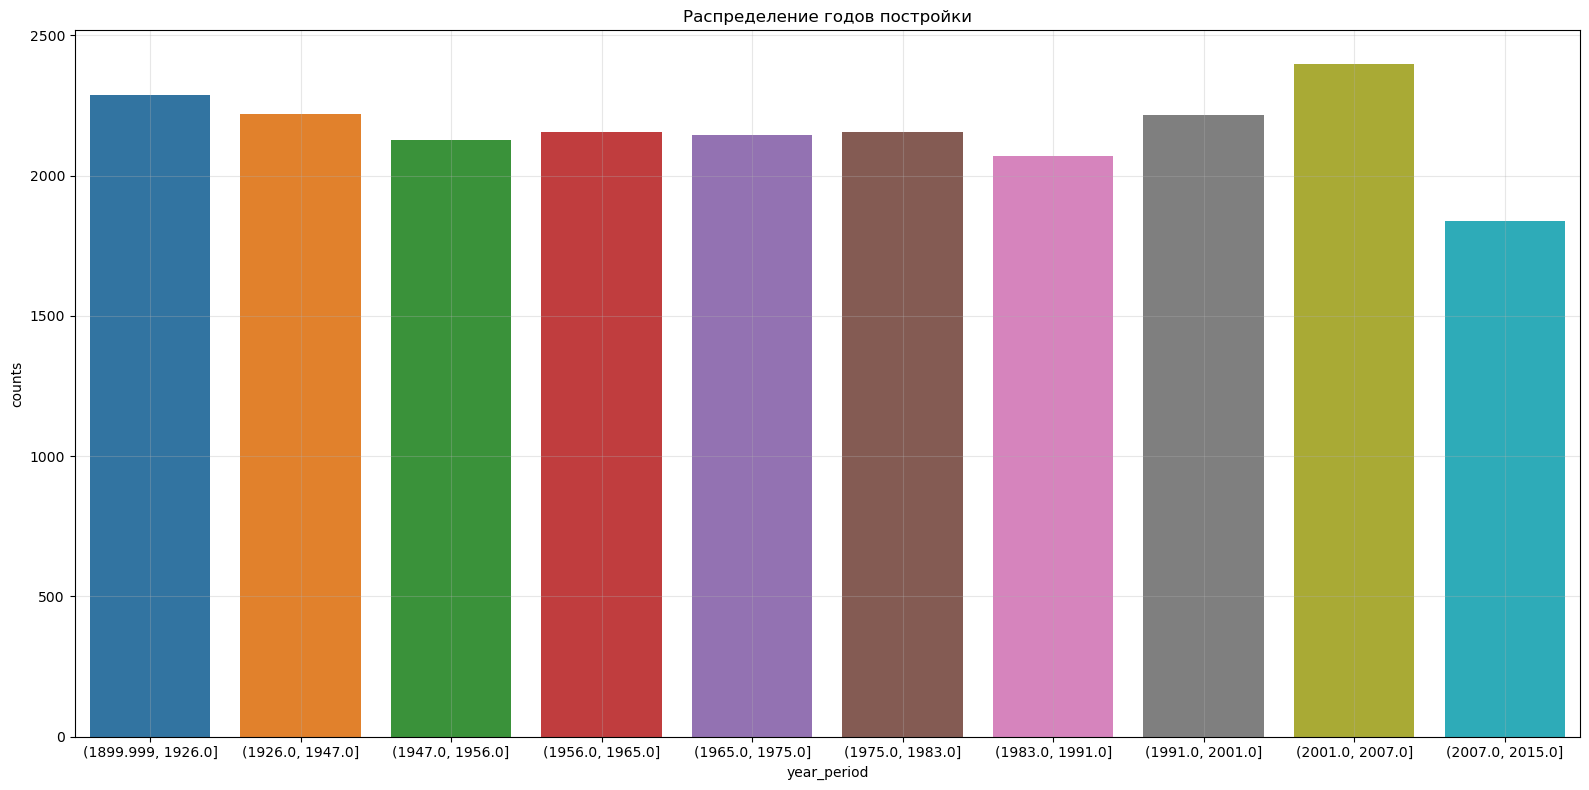

In [10]:
plt.figure(figsize=(16, 8))
plt.title('Распределение годов постройки')
sns.barplot(data=yr_built_counts_df, x="year_period", y="counts")
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

Больше всего домов было построено в период с 2001 по 2007 год.

### 2 Задание

In [11]:
houses_with_waterfront_df = df['waterfront'].value_counts().reset_index()
houses_with_waterfront_df.columns = ['вид на набережную', 'количество']
houses_with_waterfront_df.loc[:, 'вид на набережную'] = ['есть', 'нет']

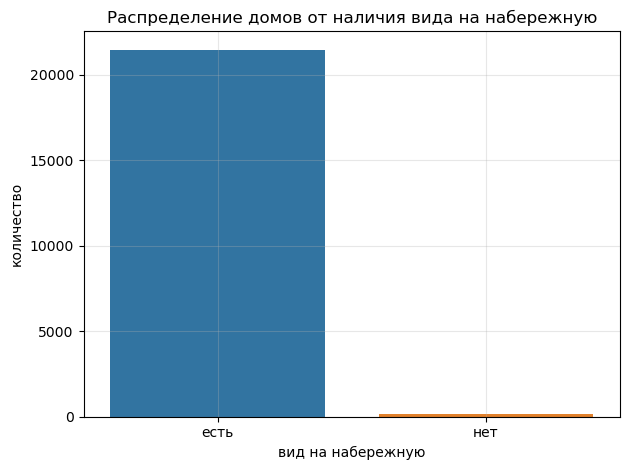

In [12]:
plt.title('Распределение домов от наличия вида на набережную')
sns.barplot(data=houses_with_waterfront_df, x="вид на набережную", y="количество")
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
print(f"Домов с видом на набережную сильно больше, чем домов без такового.\nДома без вида на набережную составляют {(houses_with_waterfront_df.iloc[1, 1] / houses_with_waterfront_df.iloc[0, 1]) * 100:.2f}% от домов с видом на неё")

Домов с видом на набережную сильно больше, чем домов без такового.
Дома без вида на набережную составляют 0.76% от домов с видом на неё


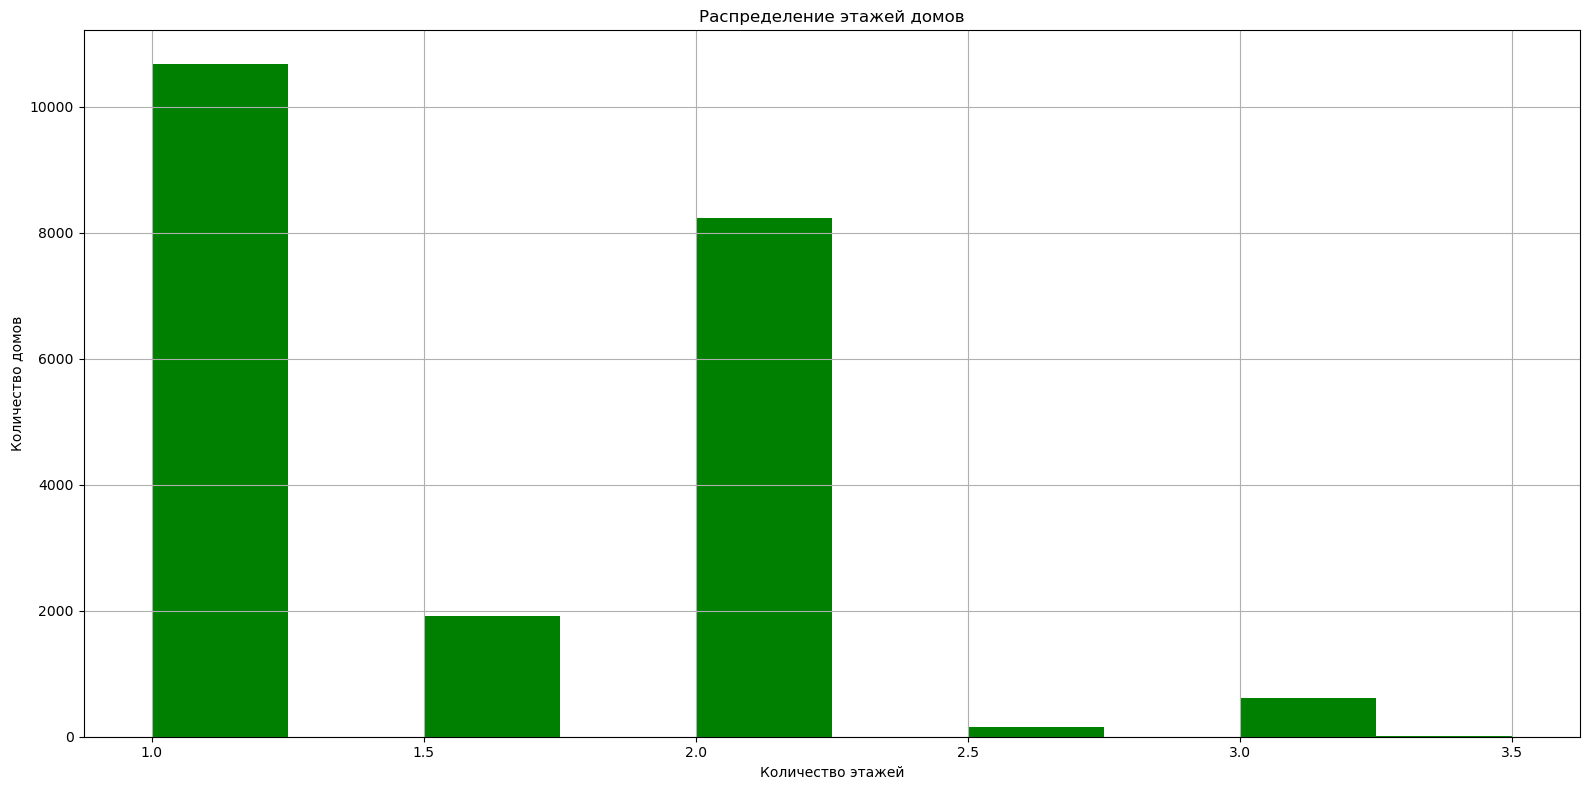

In [14]:
plt.figure(figsize=(16, 8))

df['floors'].hist(density=False, color='g')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')

plt.title('Распределение этажей домов')
plt.tight_layout()
plt.show()

В датасете больше всего одноэтажных домов

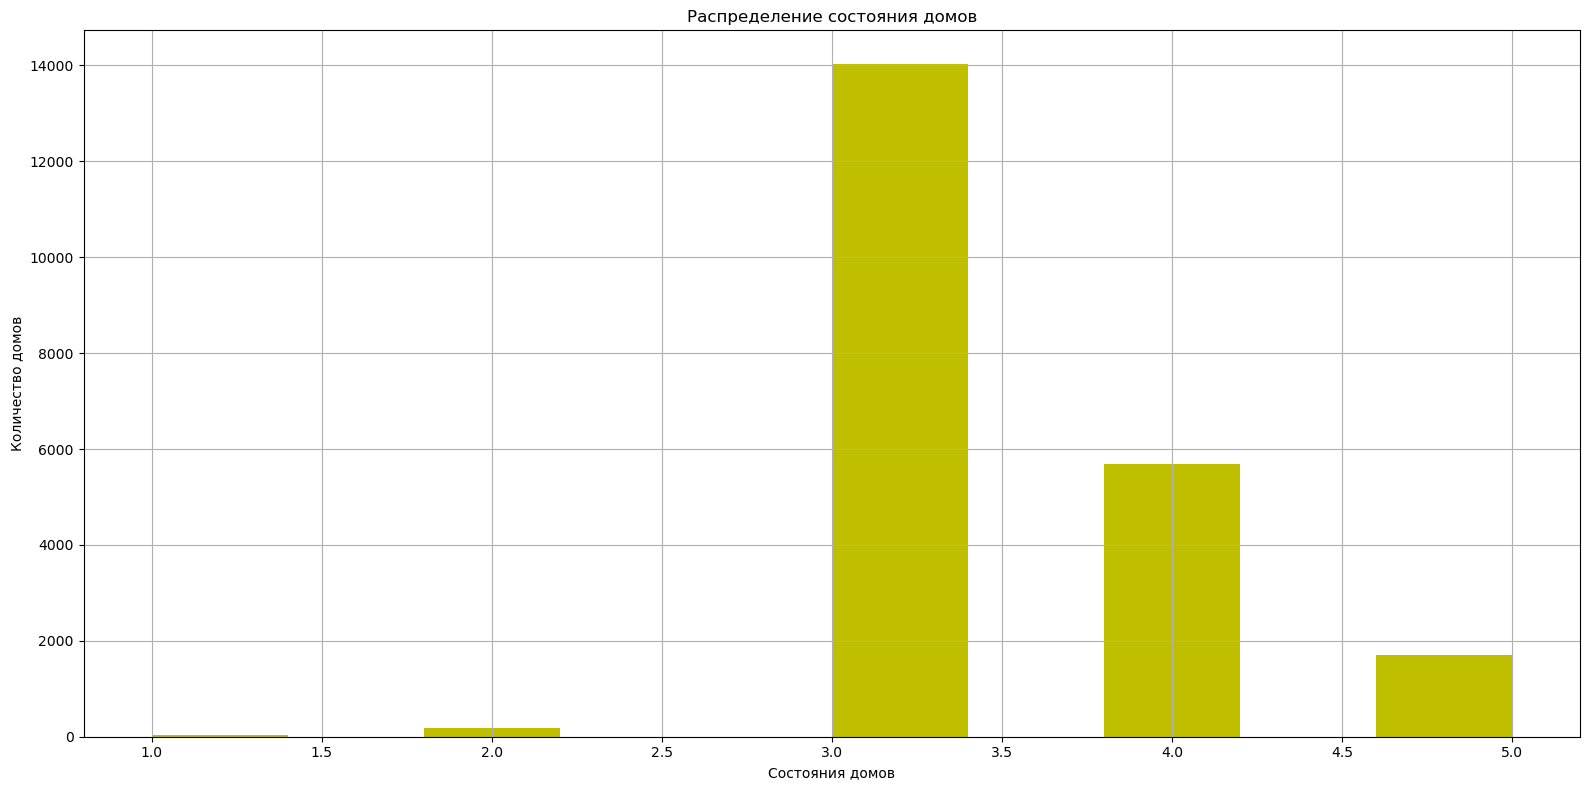

In [15]:
plt.figure(figsize=(16, 8))

df['condition'].hist(density=False, color='y')
plt.xlabel('Состояния домов')
plt.ylabel('Количество домов')

plt.title('Распределение состояния домов')
plt.tight_layout()
plt.show()

В датасете больше всего домов с состоянием 3

### 3 Задание

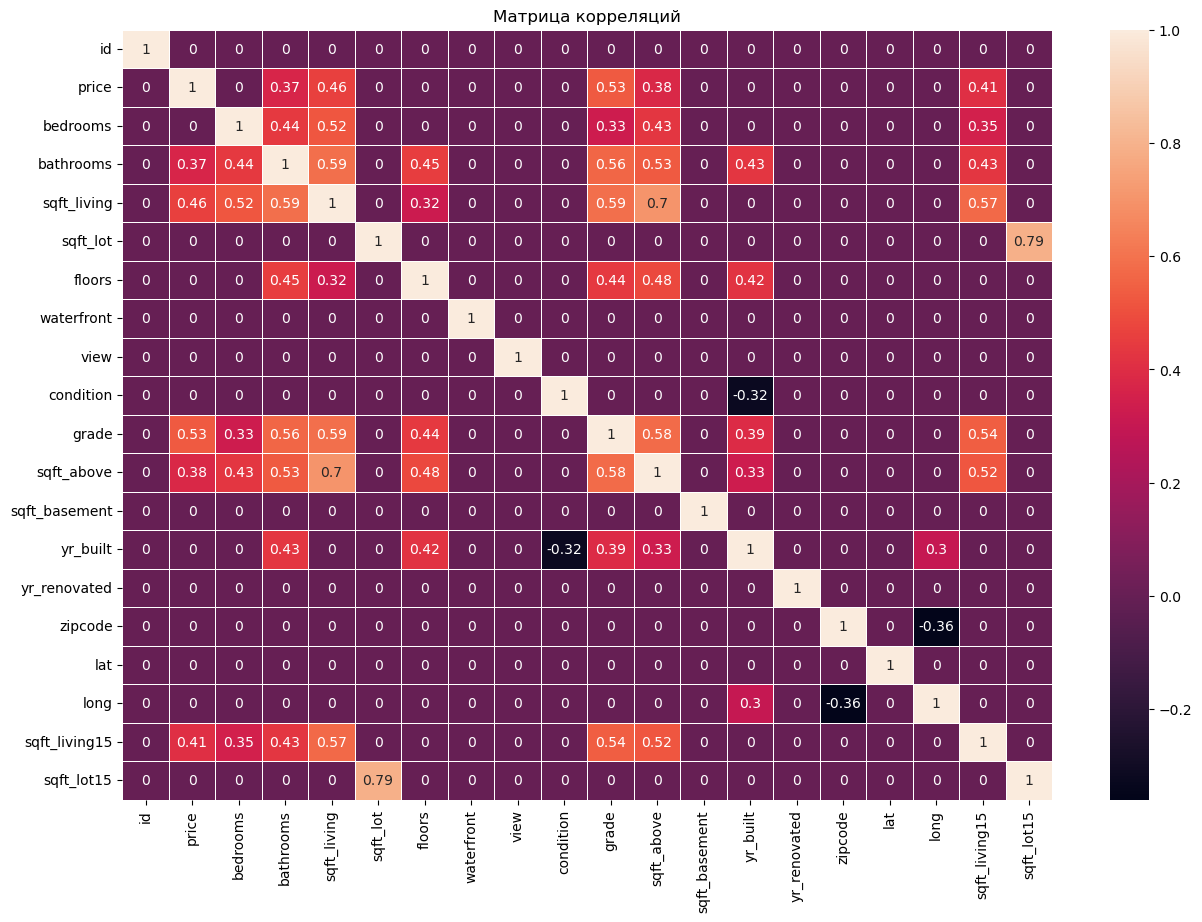

In [63]:
plt.figure(figsize=(15, 10))

corr_matrix = df.corr(method='kendall')
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5)

plt.title('Матрица корреляций')
plt.show()

Для целевого признака `price` наблюдается сильная коррелция (линейная зависимость) c признаками `bathrooms`, `sqft_living`, `grade`, `sqft_above` и `sqft_living15`

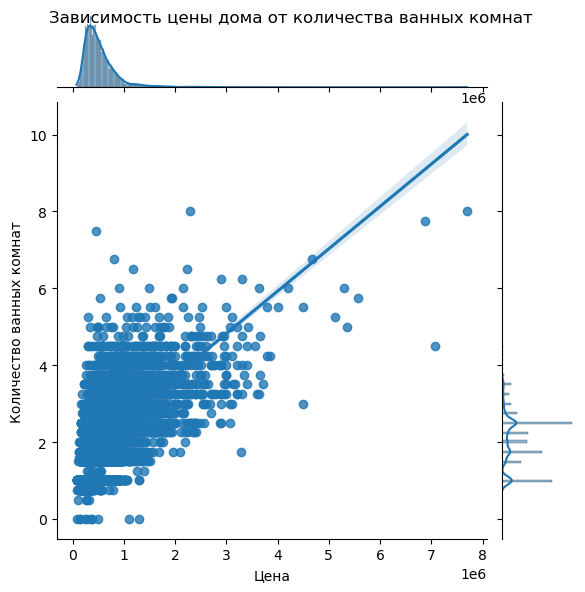

In [74]:
sns.jointplot(data = df, x='price', y='bathrooms', kind='reg')
plt.suptitle("Зависимость цены дома от количества ванных комнат")
plt.xlabel('Цена')
plt.ylabel('Количество ванных комнат');

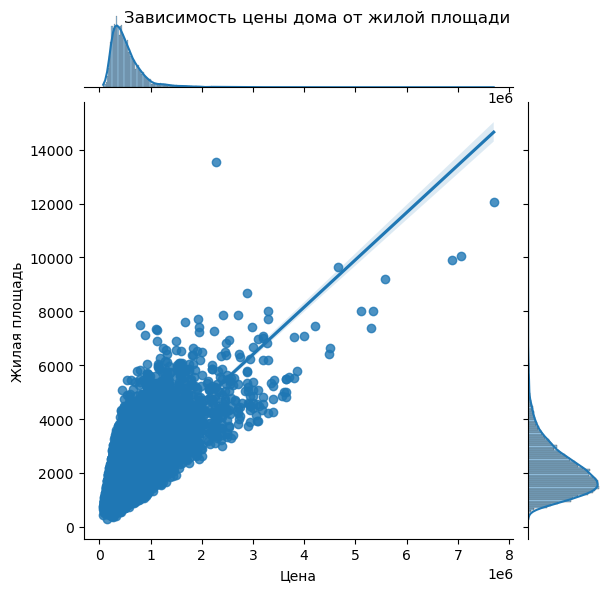

In [75]:
sns.jointplot(data = df, x='price', y='sqft_living', kind='reg')
plt.suptitle("Зависимость цены дома от жилой площади")
plt.xlabel('Цена')
plt.ylabel('Жилая площадь');

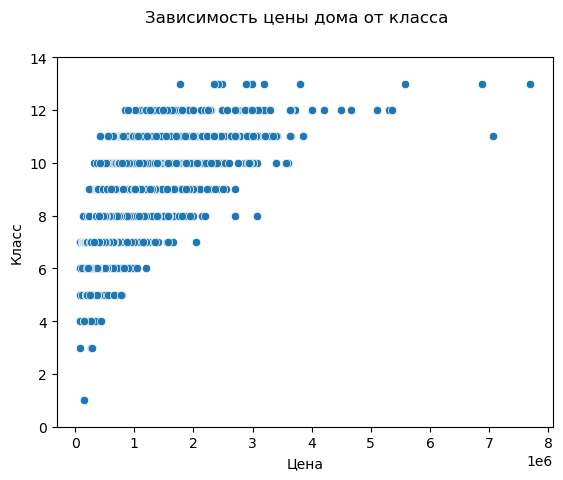

In [80]:
sns.scatterplot(data = df, x='price', y='grade')
plt.suptitle("Зависимость цены дома от класса")
plt.xlabel('Цена')
plt.ylabel('Класс')
plt.ylim([0, 14]);

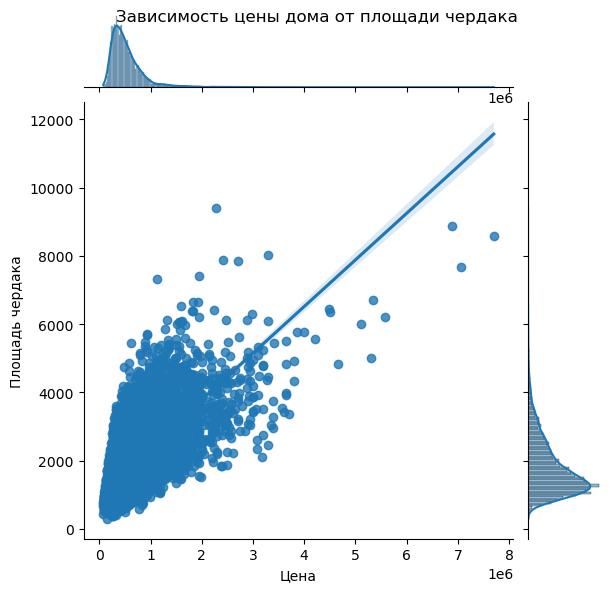

In [81]:
sns.jointplot(data = df, x='price', y='sqft_above', kind='reg')
plt.suptitle("Зависимость цены дома от площади чердака")
plt.xlabel('Цена')
plt.ylabel('Площадь чердака');

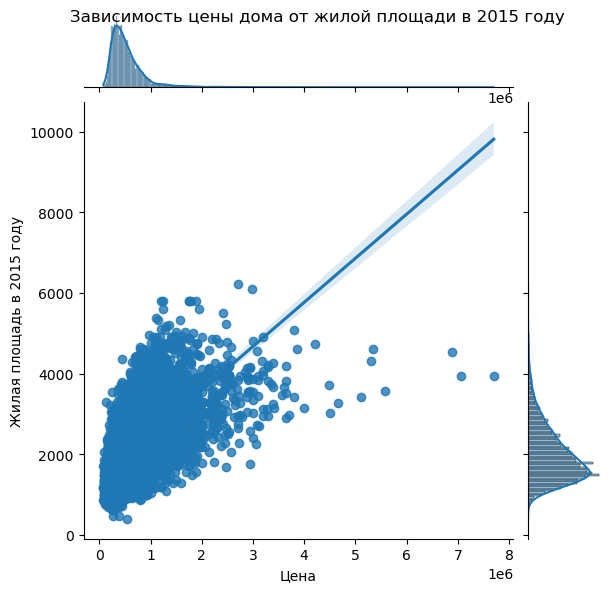

In [82]:
sns.jointplot(data = df, x='price', y='sqft_living15', kind='reg')
plt.suptitle("Зависимость цены дома от жилой площади в 2015 году")
plt.xlabel('Цена')
plt.ylabel('Жилая площадь в 2015 году');